In [5]:
# Parameters
param_dict = {
  "cave": {
    "crop": {
      "top_left": {
        "x": 180,
        "y": 90
      },
      "bottom_right": {
        "x": 330,
        "y": 280
      }
    },
    "center": {
      "x": 72,
      "y": 100
    },
    "curve": {
      "x": 131,
      "y": 180,
    },
    "start": {
      "angle": 144.5,
      "value": 0.4
    },
    "end": {
      "angle": 404,
      "value": 10
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 90,
    "threshold_brightness": 255,
    "minLineLength": 40,
    "maxLineGap": 1
  },
  "water": {
    "crop": {
      "top_left": {
        "x": 100,
        "y": 100
      },
      "bottom_right": {
        "x": 600,
        "y": 600
      }
    },
    "center": {
      "x": 248,
      "y": 330
    },
    "curve": {
      "x": 430,
      "y": 430,
    },
    "start": {
      "angle": 223,
      "value": 100
    },
    "end": {
      "angle": 315.5,
      "value": 250
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 60,
    "threshold_brightness": 20,
    "threashold_reverse": True,
    "minLineLength": 170,
    "maxLineGap": 30
  },
  "gauge_1": {
    "crop": {
      "top_left": {
        "x": 50,
        "y": 50
      },
      "bottom_right": {
        "x": 650,
        "y": 650
      }
    },
    "center": {
      "x": 295,
      "y": 305
    },
    "curve": {
      "x": 500,
      "y": 500,
    },
    "start": {
      "angle": 135,
      "value": 0
    },
    "end": {
      "angle": 406,
      "value": 1000
    },

    "number_of_shape_countours_threshold": 150,
    "threshold_value": 190,
    "threshold_brightness": 130,
    "minLineLength": 90,
    "maxLineGap": 0
  },
}

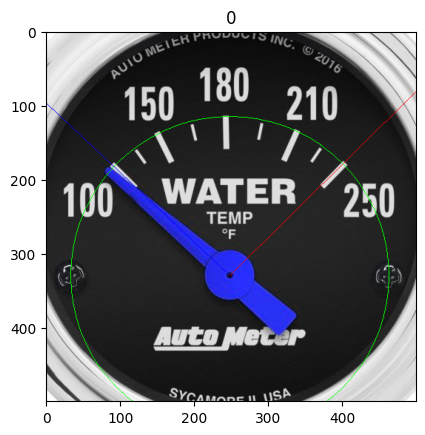

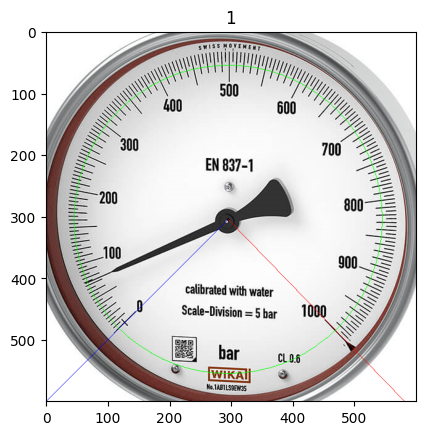

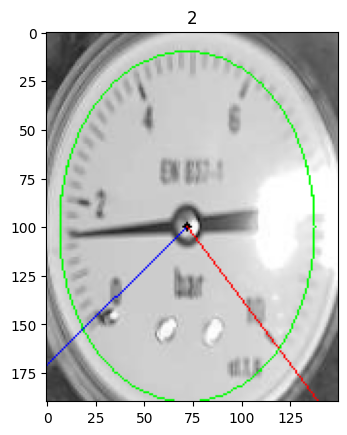

Type: water
Params: {'crop': {'top_left': {'x': 100, 'y': 100}, 'bottom_right': {'x': 600, 'y': 600}}, 'center': {'x': 248, 'y': 330}, 'curve': {'x': 430, 'y': 430}, 'start': {'angle': 223, 'value': 100}, 'end': {'angle': 315.5, 'value': 250}, 'number_of_shape_countours_threshold': 150, 'threshold_value': 60, 'threshold_brightness': 20, 'threashold_reverse': True, 'minLineLength': 170, 'maxLineGap': 30}
Type: gauge_1
Params: {'crop': {'top_left': {'x': 50, 'y': 50}, 'bottom_right': {'x': 650, 'y': 650}}, 'center': {'x': 295, 'y': 305}, 'curve': {'x': 500, 'y': 500}, 'start': {'angle': 135, 'value': 0}, 'end': {'angle': 406, 'value': 1000}, 'number_of_shape_countours_threshold': 150, 'threshold_value': 190, 'threshold_brightness': 130, 'minLineLength': 90, 'maxLineGap': 0}
Type: cave
Params: {'crop': {'top_left': {'x': 180, 'y': 90}, 'bottom_right': {'x': 330, 'y': 280}}, 'center': {'x': 72, 'y': 100}, 'curve': {'x': 131, 'y': 180}, 'start': {'angle': 144.5, 'value': 0.4}, 'end': {'angl

In [6]:
from matplotlib import pyplot as plt
import cv2
import glob
import re
import numpy as np

# List all images with name image{X}.png
image_files = glob.glob('image_*_main.*')

# Load all images using cv2
images = [cv2.imread(image_file) for image_file in image_files]

# Extract the type part from the file name
type_pattern = re.compile(r'image_(.*?)_main\..*')
types = [type_pattern.search(file).group(1) for file in image_files]

ellipses = []

for i in range(len(images)):
  params = param_dict.get(types[i], None)

  ellipses.append(None)

  if params is None:
    continue

  
  crop_data = params.get("crop")
  top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
  bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))
  
  images[i] = images[i][top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

  cp = images[i].copy()

  # Draw the center from params "center"
  center = (params.get("center").get("x"), params.get("center").get("y"))
  curve = (params.get("curve").get("x"), params.get("curve").get("y"))
  cv2.circle(cp, center, 2, (0,0,0), -1)

  # Draw the start point from params "start"
  # start = (params.get("start").get("x"), params.get("start").get("y"))
  start_angle = params.get("start").get("angle")
  start_angle_rad = np.radians(start_angle)
  start = (int(center[0] + curve[0] * np.cos(start_angle_rad)), int(center[1] + curve[1] * np.sin(start_angle_rad)))
  cv2.line(cp, center, start, (0, 0, 255), 1)

   # Draw the end point from params "end"
  # end = (params.get("end").get("x"), params.get("end").get("y"))
  end_angle = params.get("end").get("angle")
  end_angle_rad = np.radians(end_angle)
  end = (int(center[0] + curve[0] * np.cos(end_angle_rad)), int(center[1] + curve[1] * np.sin(end_angle_rad)))
  cv2.line(cp, center, end, (255, 0, 0), 1)

  ellipse = (center, (params.get("curve").get("x"), params.get("curve").get("y")), 0)
  ellipses[i] = ellipse

  cv2.ellipse(cp, ellipse, (0, 255, 0), 1)

  plt.imshow(cp)
  plt.title(i)
  plt.show()

for i in range(len(images)):
  print("Type:", types[i])
  print("Params:", param_dict.get(types[i], None))


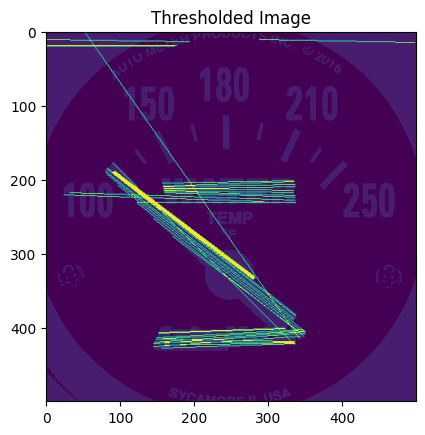

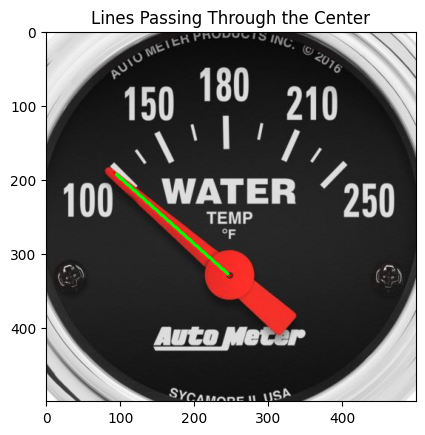

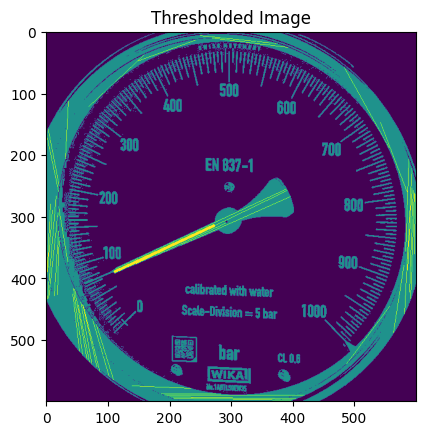

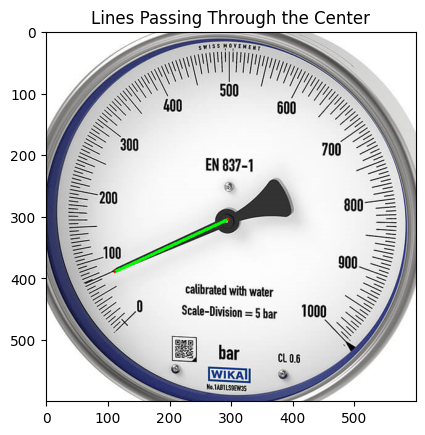

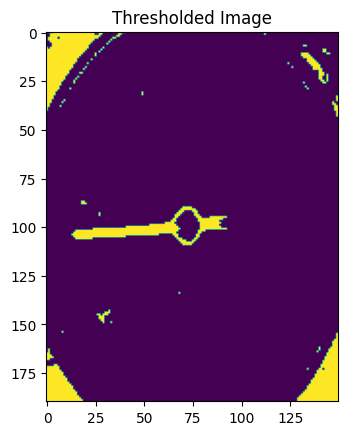

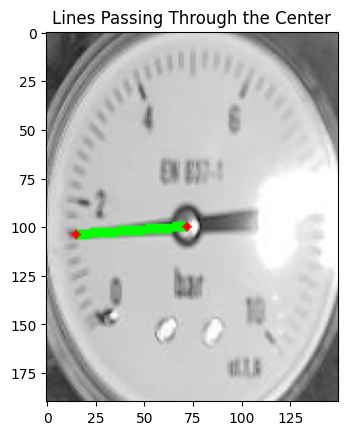

In [7]:

import lib.helpers as helpers

needle_points = []
for a in range(len(images)):
  params = param_dict.get(types[a], None)
  needle_points.append(None)
  ellipse = ellipses[a]

  if ellipse is None:
    continue

  needle_point, filtered_lines, all, dst2 = helpers.find_needle(images[a], ellipse, params.get("threshold_value"), params.get("threshold_brightness"), params.get("minLineLength"), params.get("maxLineGap"), params.get("threashold_reverse"))

  thresh = dst2.copy()
  render_needle = images[a].copy()

  if not needle_point is None:
    needle_points[a] = needle_point
     # Draw the lines on the ROI
    cv2.line(render_needle, needle_point, ellipse[0], (0, 255, 0), 3)

    # Draw the furthest point on the ROI
    cv2.circle(render_needle, needle_point, 2, (0, 0, 255), -1)

    # Draw the center of the ROI
    cv2.circle(render_needle, ellipse[0], 2, (0, 0, 255), -1)


  # Draw all the filtered lines on the ROI
  for line in all:
    x1, y1, x2, y2 = line[0]
    cv2.line(thresh, (x1, y1), (x2, y2), (255, 0, 0), 1)

  # Draw all the filtered lines on the ROI
  for line in filtered_lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(thresh, (x1, y1), (x2, y2), (255, 0, 255), 3)

 
  # Display the image dst2
  plt.imshow(thresh)
  plt.title('Thresholded Image')
  plt.show()

  # Display the image with lines
  plt.imshow(cv2.cvtColor(render_needle, cv2.COLOR_BGR2RGB))
  plt.title('Lines Passing Through the Center')
  plt.show()

Files matching pattern 'image_water_*': ['image_water_main.jpg']
Start Angle Rad: 3.8920842319473548 Start Angle: 223
End Angle Rad: 5.50651379004211 End Angle: 315.5
Needle Angle: -138.29814299368442 -2.4137579446337205
(90, 476) (401, 480) (87, 186)
1.4802096494402885 1.6144295580947552 1350.884841043611 0.31704585311202865 4.668755749084831
Value 147.5568779668043


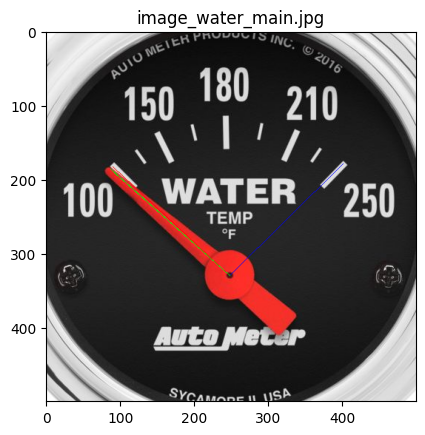

Files matching pattern 'image_gauge_1_*': ['image_gauge_1_main.png']
Start Angle Rad: 2.356194490192345 Start Angle: 135
End Angle Rad: 7.086036763096978 End Angle: 406
Needle Angle: 155.20511588284097 2.7088402880949207
(118, 128) (468, 125) (68, 409)
0.3557875833287225 4.729842272904633 1570.7963267948965 0.22904636997634703 1.5533430342749535
Value 229.04636997634702


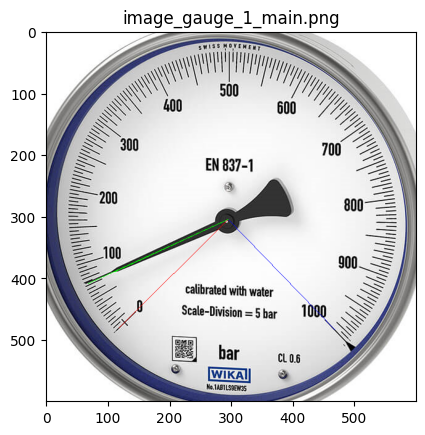

Files matching pattern 'image_cave_*': ['image_cave_1.png', 'image_cave_main.png']
Start Angle Rad: 2.522000769131806 Start Angle: 144.5
End Angle Rad: 7.051130178057091 End Angle: 404
Needle Angle: 179.06080905426444 3.125200679281788
(18, 47) (119, 37) (6, 101)
0.6044415285832172 4.529129408925286 494.5439635272023 0.3445965029876067 1.7540558982543004
Value 3.708126428681024


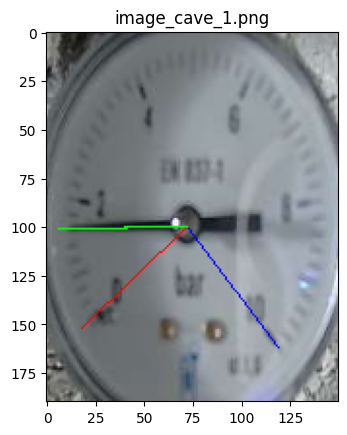

Start Angle Rad: 2.522000769131806 Start Angle: 144.5
End Angle Rad: 7.051130178057091 End Angle: 404
Needle Angle: 175.98582430458896 3.0715320709513376
(18, 47) (119, 37) (6, 106)
0.5289319972572422 4.529129408925286 494.5439635272023 0.3015479710673157 1.7540558982543004
Value 3.29486052224623


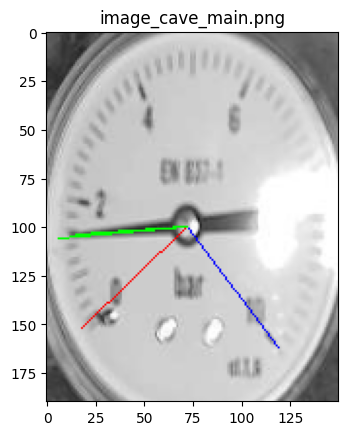

In [8]:
import numpy as np

# Look for files matching the pattern "image_{type}_{x}.png"
for a in range(len(images)):
  pattern = f'image_{types[a]}_*'
  matching_files = glob.glob(pattern)
  params = param_dict.get(types[a], None)
  
  print(f"Files matching pattern '{pattern}': {matching_files}")

  # Load each matching image using cv2
  for file in matching_files:
    image = cv2.imread(file)

    ellipse = ellipses[a]

    if ellipse is None or params is None:
      continue

    center = ellipse[0]
    radius_x = ellipse[1][0] / 2
    radius_y = ellipse[1][1] / 2

    start_angle = params.get("start").get("angle")
    start_angle_rad = np.radians(start_angle)
    start = (int(ellipse[0][0] + radius_x * np.cos(start_angle_rad)), int(ellipse[0][1] + radius_y * np.sin(start_angle_rad)))

    end_angle = params.get("end").get("angle")
    end_angle_rad = np.radians(end_angle)
    end = (int(ellipse[0][0] + radius_x * np.cos(end_angle_rad)), int(ellipse[0][1] + radius_y * np.sin(end_angle_rad)))

    crop_data = params.get("crop")
    top_left = (crop_data.get("top_left").get("x"), crop_data.get("top_left").get("y"))
    bottom_right = (crop_data.get("bottom_right").get("x"), crop_data.get("bottom_right").get("y"))
    
    images[i] = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

    cropped = images[i].copy()

    print("Start Angle Rad:", start_angle_rad, "Start Angle:", start_angle)
    print("End Angle Rad:", end_angle_rad, "End Angle:", end_angle)

    needle, filtered, all, _ = helpers.find_needle(cropped, ellipse, params.get("threshold_value"), params.get("threshold_brightness"), params.get("minLineLength"), params.get("maxLineGap"), params.get("threashold_reverse"))

        
    # Draw the start angle line
    cv2.line(cropped, center, start, (0, 0, 255), 1)

    # Draw the end angle line
    cv2.line(cropped, center, end, (255, 0, 0), 1)

    # # Draw all the filtered lines on the ROI
    # for line in all:
    #   x1, y1, x2, y2 = line[0]
    #   cv2.line(cropped, (x1, y1), (x2, y2), (128, 0, 0), 1)

    # # Draw all the filtered lines on the ROI
    # for line in filtered_lines:
    #   x1, y1, x2, y2 = line[0]
    #   cv2.line(cropped, (x1, y1), (x2, y2), (255, 255, 255), 1)

    if not needle is None:

      needle_angle_rad = np.arctan2(needle[1] - ellipse[0][1], needle[0] - ellipse[0][0])
      needle_angle = np.degrees(needle_angle_rad)
      print("Needle Angle:", needle_angle, needle_angle_rad)

      new_needle_point = (int(ellipse[0][0] + radius_x * np.cos(needle_angle_rad)), int(ellipse[0][1] + radius_y * np.sin(needle_angle_rad)))

      cv2.line(cropped, new_needle_point, ellipse[0], (0, 255, 0), 1)

      gauge_value = helpers.calculate_gauge_value(ellipse, new_needle_point, start_angle, end_angle, params.get("start").get("value"), params.get("end").get("value"))

      print("Value", gauge_value)

      # Draw the needle on the cropped image
      cv2.line(cropped, needle, ellipse[0], (0, 255, 0), 1)
    else:
      print("No needle found")

    #   # Draw the start gauge limit
    # cv2.line(cropped, center, start, (255, 0, 0), 1)

    # # Draw the end gauge limit
    # cv2.line(cropped, center, end, (0, 0, 255), 1)

    plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
    plt.title(file)
    plt.show()

